# Zomato Data Analysis

### import librabries 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

### load dataset

In [10]:
data = pd.read_csv("Zomato data .csv")

In [11]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### convert rate from 4.1/5 to 4.1

In [12]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)
data["rate"] = data["rate"].apply(handleRate)
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


##### no null value present 

#### Type Of Restaurant

Text(0.5, 0, 'Type Of Restaurant')

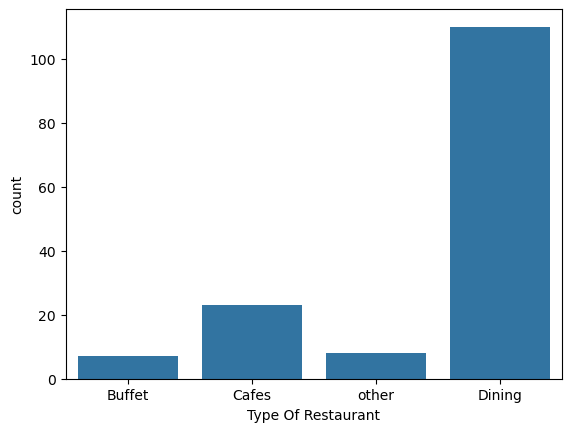

In [14]:
sns.countplot(x=data["listed_in(type)"])
plt.xlabel("Type Of Restaurant")

#### Conclusion:- the majority of restaurant fall into dinning category

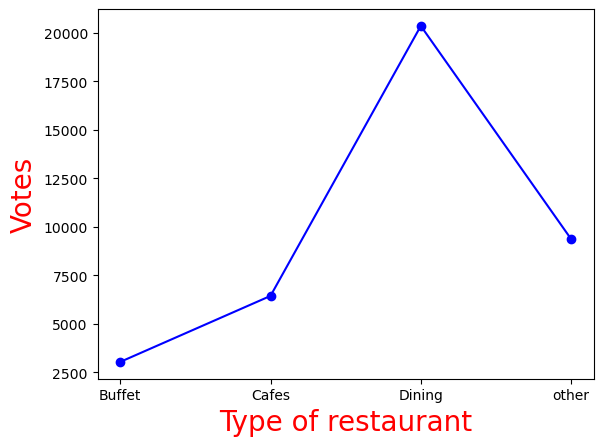

In [17]:
group_data = data.groupby("listed_in(type)")['votes'].sum()
result = pd.DataFrame({'votes':group_data})
plt.plot(result , c="blue" , marker="o")
plt.xlabel("Type of restaurant", color="red", fontsize=20)
plt.ylabel("Votes", color="red", fontsize=20)
plt.show()

#### Conclusion:- The majority of people prefer dinning

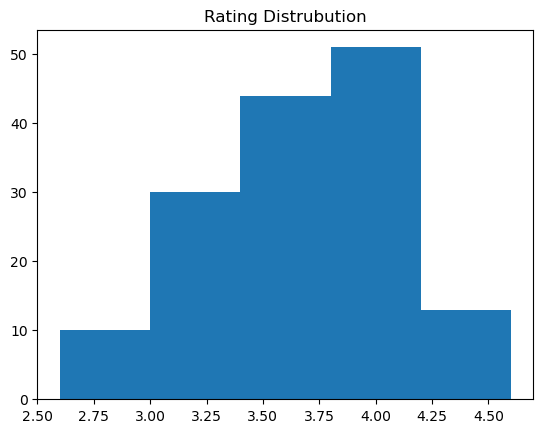

In [19]:
plt.hist(data["rate"],bins=5)
plt.title("Rating Distrubution")
plt.show()

#### Conclusions:- The majority of restaurant received rating from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

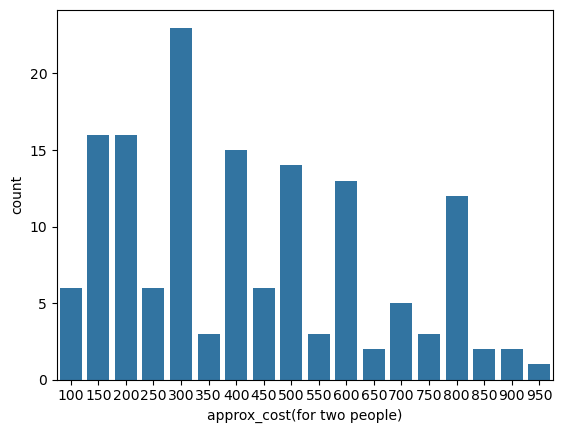

In [21]:
sns.countplot(x=data["approx_cost(for two people)"])

#### Conclusions:- The majority of people prefer restaurant with rupees 300

<Axes: xlabel='online_order', ylabel='rate'>

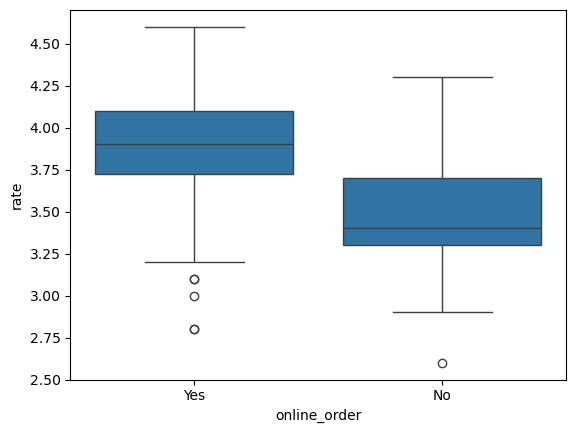

In [22]:
sns.boxplot(x='online_order',y='rate',data=data)

#### Conclusions:- offline order received lower rating as compared to online order 

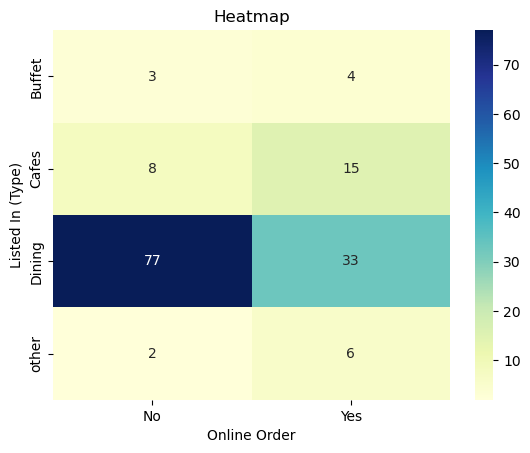

In [25]:
pivot = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size')
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()                             

#### Conclusion:- Dinning restaurant primarily accept offline orders,cafes accept online order . this suggest that client prefer to place order in person at restaurant but prefer online ordering at cafes 